## Notebook for Evaluation of HDF5 Simulation Results

In [11]:
#Imports
import glob, os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Show all available hdf5-datafiles
all_hdf5_files_path = "C:\\Users\\Daniel\\Desktop\\Projekte\\smabui\\data\\database\\results"
os.chdir(all_hdf5_files_path)
for file in glob.glob("*.hdf5"):
    print(file)

results_2022-10-03_#542.hdf5
results_2022-10-03_#543.hdf5
results_2022-10-03_#544.hdf5
results_2022-10-03_#545.hdf5
results_2022-10-03_#546.hdf5
results_2022-10-19_#547.hdf5
results_2022-10-19_#548.hdf5
results_2022-10-19_#549.hdf5
results_2022-10-19_#550.hdf5
results_2022-10-19_#551.hdf5
results_2022-10-19_#552.hdf5
results_2022-10-19_#553.hdf5
results_2022-10-19_#554.hdf5
results_2022-10-19_#555.hdf5
results_2022-10-19_#556.hdf5
results_2022-10-19_#557.hdf5
results_2022-10-19_#558.hdf5
results_2022-10-19_#559.hdf5
results_2022-10-19_#560.hdf5
results_2022-10-19_#561.hdf5
results_2022-10-19_#562.hdf5
results_2022-10-19_#563.hdf5
results_2022-10-19_#564.hdf5
results_2022-10-19_#565.hdf5
results_2022-10-19_#566.hdf5
results_2022-10-19_#567.hdf5
results_2022-10-19_#568.hdf5
results_2022-10-19_#569.hdf5
results_2022-10-19_#570.hdf5
results_2022-10-19_#571.hdf5
results_2022-10-19_#572.hdf5
results_2022-10-19_#573.hdf5
results_2022-10-19_#574.hdf5
results_2022-10-19_#575.hdf5
results_2022-1

In [37]:
#Chose your hdf5 datafile
choice = "results_2022-10-23_#611.hdf5" # test: "results_2022-02-02_#20.hdf5"
datafilePath = "C:\\Users\\Daniel\\Desktop\\Projekte\\smabui\\data\\database\\results\\" + choice
print(datafilePath)

C:\Users\Daniel\Desktop\Projekte\smabui\data\database\results\results_2022-10-23_#611.hdf5


In [38]:
#Reads the data stored in a hdf5 datafile
data = h5py.File(datafilePath, "r")

In [39]:
# Reading names of tracked components also known as series groups
series = {}
#series["pv"] = [b for b in data["Series"].keys() if "PV" in b]
series["load"] = [l for l in data["Series"].keys() if "Load" in l]
#series["storage"] = [s for s in data["Series"].keys() if "Storage" in s]
#series["cs"] = [c for c in data["Series"].keys() if "CS" in c]
print(series)

{'load': ['LoadSim-0.household_0', 'LoadSim-0.household_1']}


### Reading tracked parameters of components

In [47]:
# Reading tracked parameters of components
series_parameters={}

for component in data["Series"]:
    if "PV" in component:
        series_parameters["pv"] = [b for b in data["Series"][component].keys()]
    elif "Load" in component:
        series_parameters["load"] = [b for b in data["Series"][component].keys()]
    elif "Storage" in component:
        series_parameters["storage"] = [b for b in data["Series"][component].keys()]
    elif "Car" in component:
        series_parameters["car"] = [b for b in data["Series"][component].keys()]
    elif "CS" in component:
        series_parameters["cs"] = [b for b in data["Series"][component].keys()]

print(series_parameters)

{'load': ['P']}


### Manuel setting of parameters for visualization

In [48]:
# Reading parameters or value definition of wanted datarow
params = {}
#params["pv"] = ["P_ACTUAL"]
params["load"] = ["P"]
#params["storage"] = ["SOC", "P_SET"]
#params["cs"] = ["P"]
print(params)

{'load': ['P']}


### Extracting Data from HDF5 based on set Parameters

In [49]:
# WARNING FOR MORE THAN ONE COMPONENT IN A COMPONENT_GROUP ONE LAYER HAS TO BE ADDED (eg two PV) (level of nested dict +1)
# create needed lists and (nested) dicts for results
output_list = []
results = {}
for component_group, component_name in series.items():
    for component in component_name:
        #creates nested dict with modified columns (e.g. PVSim-0.PV_0 -> PV_0) as key
        results[component.split(".")[-1]] = {}

# loop through all series.iterable (e.g. "pv") and components (e.g. "PVSim-0.PV_0")
for component_group, component_name in series.items():
    # create new params (e.g. pv, car) list to loop
    params_list = series_parameters[component_group]
    for par in params_list:
            for component in component_name:
                # save current time_series (e.g. ["pv"]["P_ACTUAL"])
                output = data["Series"][component][par]
                output_list.append(output)                       
                
                # factor for converting [W] into [kW] and [-] into [%]
                if component_group in ["cs", "load", "storage", "pv"]:
                    factor = 1/1000
                if par in ["SOC"]:
                    factor = 100 
                
                #fill dict (e.g. PV_0) with each params
                results[component.split(".")[-1]][par] = np.array(output)*factor

In [50]:
print(results.keys())

dict_keys(['household_0', 'household_1'])


### Adding calculated values e.g. residual load or power at grid connection point

In [60]:
# Residuallast
for i in range(0,no_households):
    results["household_"+str(i)]["P_residual"] = results["household_"+str(i)]["P"] - abs(results["PV_"+str(i)]["P"]) 
    



In [44]:
# Show what is available
print("Die folgenden Komponenten stehen zur Verfügung: ",results.keys())
print()
print("Die folgenden Parameter wurden überwacht: ",series_parameters)

Die folgenden Komponenten stehen zur Verfügung:  dict_keys(['household_0', 'household_1'])

Die folgenden Parameter wurden überwacht:  {'load': ['P']}


### Data Plotting

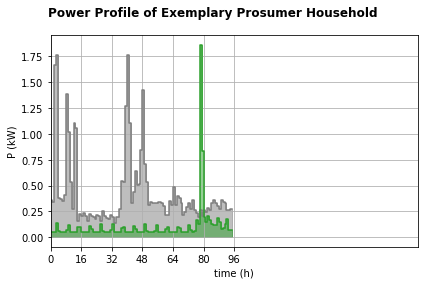

In [46]:
for j in range(0,no_of_cs):
    for i in range(0,no_households):
        fig, ax1 = plt.subplots()
        plt.grid()

        # Time
        t = np.arange(0,96)

        # Axis Labels
        ax1.set_xlabel("time (h)")
        ax1.set_ylabel("P (kW)")

        # Household Load
        color = "tab:grey"
        ax1.plot(t, results["household_"+str(i)]["P"], color = color, drawstyle = "steps") 
        ax1.tick_params(axis='y')
        ax1.fill_between(t, results["household_"+str(i)]["P"], color = color, alpha=.5, step="pre")

color = "tab:green"
ax1.plot(t, results["household_1"]["P"], color = color, drawstyle = "steps") 
ax1.tick_params(axis='y')
ax1.fill_between(t, results["household_1"]["P"], color = color, alpha=.5, step="pre")

# # PV
# color = "tab:orange"
# ax1.plot(t, results["PV_0"]["P"], color = color, drawstyle = "steps", label = "P_solar")
# ax1.fill_between(t, results["PV_0"]["P"], color = color, alpha=.5, step="pre")

# # CS
# color = "tab:blue"
# ax1.plot(t, results["charging_station_0"]["P"], color = color, drawstyle = "steps", label = "P_charging")
# ax1.fill_between(t, results["charging_station_0"]["P"], color = color, alpha=.5, step="pre")

# # eStorage
# color = "tab:green"
# ax1.plot(t, results["eStorage_0"]["P"], color=color, drawstyle = "steps", label ="P_storage")

# # Residual
# color = "tab:brown"
# ax1.plot(t,results["household_0"]["P_residual"], color = color, drawstyle = "steps", label = "P_residual")

# ## SOC
# ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
# color = "tab:purple"
# ax2.plot(t, results["eStorage_0"]["SOC"], '--', color=color, label="SOC")
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylabel("SOC (%)")

# ## PLOT STYLE
# # Legends
# lines = ax1.get_lines() + ax2.get_lines()
# ax1.legend(lines, [l.get_label() for l in lines], loc="best") #.get_frame().set_facecolor('C0') 

        # PLOT LABEL
        fig.subplots_adjust()
        plot_label = "Power Profile of Exemplary Prosumer Household"
        fig.suptitle(plot_label, fontsize = 12, weight = "bold")

# Modifying x-axis
fig.canvas.draw() #We need to draw the canvas, otherwise the labels won't be positioned and won't have values yet.
# get default x_ticks
x_labels = [item.get_text() for item in ax1.get_xticklabels()]
# Setting x-ticks
ticks = np.arange(min(t),max(t+2),16)
ax1.set_xticks(ticks, minor = False) # every twelth value are 3 hours
# Limit of x-axis 
ax1.set_xlim(0,192) #Wert 96 nicht verfügbar
#set_x_labels = ["00h", "04h", "08h", "12h", "16h", "20h", "24h"]
#ax1.set_xticklabels(set_x_labels)

        # Show plot
        fig.tight_layout() # otherwise the right y-label is slightly clipped
        plt.show()

In [32]:
check5 = (results["eStorage_0"]["SOC"])
check6 = results["eStorage_0"]["P_SET_LIMIT"]


KeyError: 'P_SET_LIMIT'

## Validation of Pandapower results

In [39]:
tracked_PP_modules = {}
tracked_PP_modules["tracked_PP"] = [b for b in data["Series"].keys() if "Pandapower" in b]
print(tracked_PP_modules)

{'tracked_PP': []}


In [34]:
# Reading names of tracked components also known as component group
PPseries = {}
PPseries["PPpv"] = [b for b in data["Series"].keys() if ("Pandapower" in b and "pv" in b)]
PPseries["PPload"] = [l for l in data["Series"].keys() if ("Pandapower" in l and "house_load" in l)]
PPseries["PPstorage"] = [s for s in data["Series"].keys() if ("Pandapower" in s and "storage" in s)]
PPseries["PPcs"] = [c for c in data["Series"].keys() if ("Pandapower" in c and "charging_station" in c)]
PPseries["PPTrafo"] = [c for c in data["Series"].keys() if ("Pandapower" in c and "Trafo" in c)]
PPseries["PPBus_household"] = [c for c in data["Series"].keys() if ("Pandapower" in c and "bus_household" in c)]

print(PPseries)

{'PPpv': [], 'PPload': [], 'PPstorage': [], 'PPcs': [], 'PPTrafo': [], 'PPBus_household': []}


In [35]:
# Reading tracked parameters of components
PPseries_parameters={}

for PPcomponent in data["Series"]:
    if ("Pandapower" in PPcomponent and "pv" in PPcomponent):
        PPseries_parameters["PPpv"] = [b for b in data["Series"][PPcomponent].keys()]
    elif ("Pandapower" in PPcomponent and "house_load" in PPcomponent):
        PPseries_parameters["PPload"] = [b for b in data["Series"][PPcomponent].keys()]
    elif ("Pandapower" in PPcomponent and "storage" in PPcomponent):
        PPseries_parameters["PPstorage"] = [b for b in data["Series"][PPcomponent].keys()]
    elif ("Pandapower" in PPcomponent and "charging_station" in PPcomponent):
        PPseries_parameters["PPcs"] = [b for b in data["Series"][PPcomponent].keys()]
    elif ("Pandapower" in PPcomponent and "Trafo" in PPcomponent):
        PPseries_parameters["PPTrafo"] = [b for b in data["Series"][PPcomponent].keys()]
    elif ("Pandapower" in PPcomponent and "bus_household" in PPcomponent):
        PPseries_parameters["PPBus_household"] = [b for b in data["Series"][PPcomponent].keys()]

print(PPseries_parameters)

{}


In [36]:
test = np.array(data["Series"]['Pandapower-0.0-house_load']['p_mw'])
print(test)

KeyError: "Unable to open object (object 'Pandapower-0.0-house_load' doesn't exist)"

In [37]:
PPseries

{'PPpv': [],
 'PPload': [],
 'PPstorage': [],
 'PPcs': [],
 'PPTrafo': [],
 'PPBus_household': []}

In [38]:
# Extracting Data from HDF5 based on set Parameters

# WARNING FOR MORE THAN ONE COMPONENT IN A COMPONENT_GROUP ONE LAYER HAS TO BE ADDED (eg two PV) (level of nested dict +1)
# create needed lists and (nested) dicts for results
PPoutput_list = []
PPresults = {}
for component_group, component_name in PPseries.items():
    for component in component_name:
        #creates nested dict with modified columns (e.g. PVSim-0.PV_0 -> PV_0) as key
        PPresults["PP_"+component.split(".")[-1]] = {}

# loop through all component_group (e.g. "pv") and component_name (e.g. "PVSim-0.PV_0")
for component_group, component_name in PPseries.items():
    # create new params (e.g. pv, car) list to loop
    params_list = PPseries_parameters[component_group]
    for par in params_list:
            for component in component_name:
                # save current time_series (e.g. ["pv"]["P_ACTUAL"])
                PPoutput = data["Series"][component][par]
                PPoutput_list.append(PPoutput)                       
                factor = 1
                # factor for converting [MW] into [kW] and [-] into [%]
                if par in ["SOC"]:
                    factor = 100 
                if par in ["p_mw"]:
                    factor = 1000
                
                #fill dict (e.g. PV_0) with each params
                PPresults["PP_"+component.split(".")[-1]][par] = np.array(PPoutput)*factor

KeyError: 'PPpv'

In [39]:
PPresults.keys()

dict_keys([])

In [40]:
PPresults['PP_0-house_load']['p_mw']

KeyError: 'PP_0-house_load'

In [41]:
PPresults['PP_0-bus_household']['p_mw']

KeyError: 'PP_0-bus_household'

In [42]:
# Show what is available
print("Die folgenden Komponenten stehen zur Verfügung: ",PPresults.keys())
print()
print("Die folgenden Parameter wurden überwacht: ",PPseries_parameters)

Die folgenden Komponenten stehen zur Verfügung:  dict_keys([])

Die folgenden Parameter wurden überwacht:  {}


## Data Plott of Pandapower series

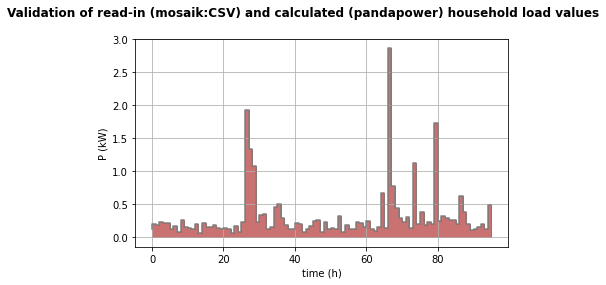

In [70]:
# Check if calculated load values [P] fit to tracked [p_mw] values from PP for household

fig, ax1 = plt.subplots()
plt.grid()

# time
t = np.arange(0,96)

# Axis Labels
ax1.set_xlabel("time (h)")
ax1.set_ylabel("P (kW)")

# Household Load
color = "tab:grey"
ax1.plot(t, results["household_0"]["P"], color = color, drawstyle = "steps") 
ax1.tick_params(axis='y')
ax1.fill_between(t, results["household_0"]["P"], color = color, alpha=.5, step="pre")

# PP Household Load
color = "tab:red"
# ax1.plot(t, PPresults["PP_0-house_load"]["p_mw"], color = color, drawstyle = "steps") 
# ax1.tick_params(axis='y')
ax1.fill_between(t, PPresults["PP_0-house_load"]["p_mw"], color = color, alpha=.5, step="pre")

# Plot LABEL
plot_label = "Validation of read-in (mosaik:CSV) and calculated (pandapower) household load values"
fig.suptitle(plot_label, fontsize = 12, weight = "bold")

# Show plot
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

NameError: name 'PPresults' is not defined

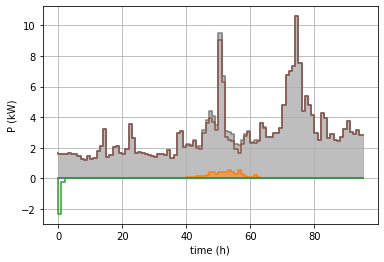

In [16]:
fig, ax1 = plt.subplots()
plt.grid()

# Time
t = np.arange(0,96)

# Axis Labels
ax1.set_xlabel("time (h)")
ax1.set_ylabel("P (kW)")

# Household Load
color = "tab:grey"
ax1.plot(t, results["household_0"]["P"], color = color, drawstyle = "steps") 
ax1.tick_params(axis='y')
ax1.fill_between(t, results["household_0"]["P"], color = color, alpha=.5, step="pre")

# PV
color = "tab:orange"
ax1.plot(t, results["PV_0"]["P"], color = color, drawstyle = "steps", label = "P_solar")
ax1.fill_between(t, results["PV_0"]["P"], color = color, alpha=.5, step="pre")

# CS
color = "tab:blue"
ax1.plot(t, results["charging_station_0"]["P"], color = color, drawstyle = "steps", label = "P_charging")
ax1.fill_between(t, results["charging_station_0"]["P"], color = color, alpha=.5, step="pre")

# eStorage
color = "tab:green"
ax1.plot(t, results["eStorage_0"]["P"], color=color, drawstyle = "steps", label ="P_storage")

# Residual
color = "tab:brown"
ax1.plot(t,results["household_0"]["P_residual"], color = color, drawstyle = "steps", label = "P_residual")

# PP BUS at Household
color = "tab:red"
ax1.plot(t, PPresults['PP_0-bus_household']['p_mw'], color = color, drawstyle = "steps", label = "Bus_HH")

# # PP Bus_household THEORETICAL
# color = "tab:pink"
# ax1.plot(t, PPresults["PP_0-bus_household"]["P_bus_theoretical"], color = color, drawstyle = "steps", label = "Bus_HH_theoretical")

## SOC
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = "tab:purple"
ax2.plot(t, results["eStorage_0"]["SOC"], '--', color=color, label="SOC")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("SOC (%)")

## PLOT STYLE
# Legends
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc="best") #.get_frame().set_facecolor('C0') 

# PLOT LABEL
fig.subplots_adjust()
plot_label = "Power Profile of Exemplary Prosumer Household"
fig.suptitle(plot_label, fontsize = 12, weight = "bold")

# Modifying x-axis
fig.canvas.draw() #We need to draw the canvas, otherwise the labels won't be positioned and won't have values yet.
# get default x_ticks
x_labels = [item.get_text() for item in ax1.get_xticklabels()]
# Setting x-ticks
ticks = np.arange(min(t),max(t+2),16)
ax1.set_xticks(ticks, minor = False) # every twelth value are 3 hours
# Limit of x-axis 
ax1.set_xlim(0,96) #Wert 96 nicht verfügbar
set_x_labels = ["00h", "04h", "08h", "12h", "16h", "20h", "24h"]
ax1.set_xticklabels(set_x_labels)

# Show plot
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()


In [72]:
# Show what is available
print("Die folgenden Komponenten stehen zur Verfügung: ",PPresults.keys())
print()
print("Die folgenden Parameter wurden überwacht: ",PPseries_parameters)

Die folgenden Komponenten stehen zur Verfügung:  dict_keys(['PP_0-pv_gen', 'PP_0-house_load', 'PP_0-battery_storage', 'PP_0-charging_station_load', 'PP_0-Trafo', 'PP_0-bus_household'])

Die folgenden Parameter wurden überwacht:  {'PPTrafo': ['loading_percent'], 'PPstorage': ['p_mw'], 'PPBus_household': ['p_mw', 'q_mvar', 'va_degree', 'vm_pu'], 'PPcs': ['p_mw'], 'PPload': ['p_mw'], 'PPpv': ['p_mw']}


In [77]:
print(PPresults.keys())

dict_keys(['PP_0-pv_gen', 'PP_0-house_load', 'PP_0-battery_storage', 'PP_0-charging_station_load', 'PP_0-Trafo', 'PP_0-bus_household'])


In [104]:
# Calculate theoretical P_BUS_HOUSEHOLD

# P_load + P_PV + P_charging + P_storage

PPresults["PP_0-bus_household"]["P_bus_theoretical"] = PPresults["PP_0-house_load"]["p_mw"] + \
    PPresults["PP_0-charging_station_load"]["p_mw"] - PPresults["PP_0-pv_gen"]["p_mw"] + PPresults["PP_0-battery_storage"]["p_mw"]

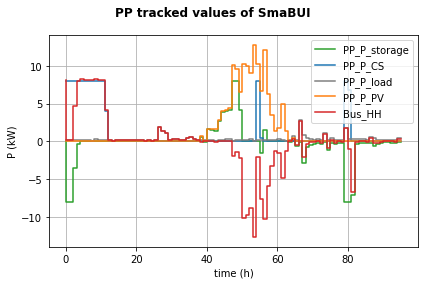

In [108]:
# Plot all Pandapower-results in order to check algebraic sign
fig, ax1 = plt.subplots()
plt.grid()

# Time
t = np.arange(0,96)

# Axis Labels
ax1.set_xlabel("time (h)")
ax1.set_ylabel("P (kW)")

# PP Battery Storage
color = "tab:green"
ax1.plot(t, PPresults["PP_0-battery_storage"]["p_mw"], color=color, drawstyle = "steps", label ="PP_P_storage")

# PP charging_station_load
color = "tab:blue"
ax1.plot(t, PPresults['PP_0-charging_station_load']['p_mw'], color = color, drawstyle = "steps", label = "PP_P_CS")

# PP house_load
color = "tab:grey"
ax1.plot(t, PPresults['PP_0-house_load']['p_mw'], color = color, drawstyle = "steps", label = "PP_P_load")

# pv_gen
color = "tab:orange"
ax1.plot(t, PPresults['PP_0-pv_gen']['p_mw'], color = color, drawstyle = "steps", label = "PP_P_PV")

# PP bus_household
color = "tab:red"
ax1.plot(t, PPresults['PP_0-bus_household']['p_mw'], color = color, drawstyle = "steps", label = "Bus_HH")

# Set Labels
lines = ax1.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc="best") #.get_frame().set_facecolor('C0') 

# PLOT LABEL
fig.subplots_adjust()
plot_label = "PP tracked values of SmaBUI"
fig.suptitle(plot_label, fontsize = 12, weight = "bold")

# Show plot
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

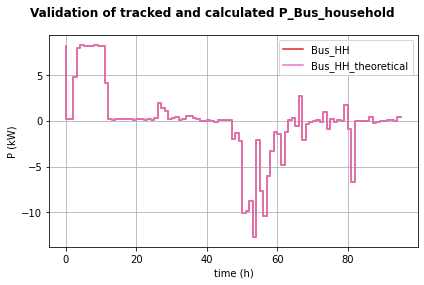

In [107]:
### Validation of tracked and calculated P_Bus_household

# Plot all Pandapower-results in order to check algebraic sign
fig, ax1 = plt.subplots()
plt.grid()

# Time
t = np.arange(0,96)

# Axis Labels
ax1.set_xlabel("time (h)")
ax1.set_ylabel("P (kW)")

# PP bus_household
color = "tab:red"
ax1.plot(t, PPresults['PP_0-bus_household']['p_mw'], color = color, drawstyle = "steps", label = "Bus_HH")

# PP Bus_household THEORETICAL
color = "tab:pink"
ax1.plot(t, PPresults["PP_0-bus_household"]["P_bus_theoretical"], color = color, drawstyle = "steps", label = "Bus_HH_theoretical")


# Set Labels
lines = ax1.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc="best") #.get_frame().set_facecolor('C0') 

# PLOT LABEL
fig.subplots_adjust()
plot_label = "Validation of tracked and calculated P_Bus_household"
fig.suptitle(plot_label, fontsize = 12, weight = "bold")

# Show plot
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show()

### Testing area

In [ ]:
print(data["Series"]["PVSim-0.PV_0"]["P_ACTUAL"])
print(data["Series"].keys())

In [ ]:
for component in series:
    print(series[component])

In [ ]:
for element, column_names in series.items():
    for column in column_names:
        print(column.split(".")[-1]) # Greift von hinten die letzten PV Benennung ab